# Insurance Claim - Fraud Detection

#### Steps used:
    
1> Data cleansing and Wrangling
2> Define the metrics for which model is getting optimized.
3> Feature Engineering
4> Data Pre-processing
5> Feature Selection
6> Split the data into training and test data sets.
7> Model Selection
8> Model Validation 
9> Interpret the result
10> save Model
11> reload model for prediction of test .csv
12>do data cleaning for test.csv
13> predict Fees

# Importing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('Automobile_insurance_fraud.csv')

In [4]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [6]:
data.shape

(1000, 40)

In [7]:
data.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [9]:
print("Number of Categories: ")
for ColName in data[['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39']]:
    print("{} = {}".format(ColName,len(data[ColName].unique())))

Number of Categories: 
months_as_customer = 391
age = 46
policy_number = 1000
policy_bind_date = 951
policy_state = 3
policy_csl = 3
policy_deductable = 3
policy_annual_premium = 991
umbrella_limit = 11
insured_zip = 995
insured_sex = 2
insured_education_level = 7
insured_occupation = 14
insured_hobbies = 20
insured_relationship = 6
capital-gains = 338
capital-loss = 354
incident_date = 60
incident_type = 4
collision_type = 4
incident_severity = 4
authorities_contacted = 5
incident_state = 7
incident_city = 7
incident_location = 1000
incident_hour_of_the_day = 24
number_of_vehicles_involved = 4
property_damage = 3
bodily_injuries = 3
witnesses = 4
police_report_available = 3
total_claim_amount = 763
injury_claim = 638
property_claim = 626
vehicle_claim = 726
auto_make = 14
auto_model = 39
auto_year = 21
fraud_reported = 2
_c39 = 1


Observation: This represents number of categories of particular type of data.
    As, fraud_reported which is going to be target variable is having 2 types of data so one will be using Logistic Regressio

## Logistic Regression Kind of technique need to resolve this problem

# EDA Process

In [10]:
data.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


## Checking null value in dataset

In [11]:
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Oservation: 1) we have 1000 number of data and _c39 contains all if the data as null so need to drop that column

### Dropping _c39

In [12]:
data.drop('_c39',
  axis='columns', inplace=True)

_c39 column has been dropped

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


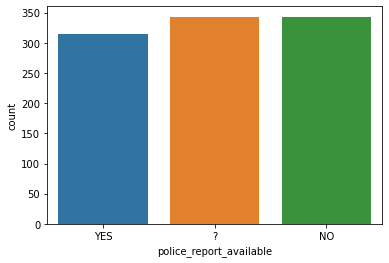

In [13]:
import seaborn as sns
alpha = sns.countplot(x="police_report_available",data=data)
print(data["police_report_available"].value_counts())

Observation: we can change ? with nan and then with mean or median. But if will encode it it will be considered as 0

In [14]:
data['police_report_available'] = data['police_report_available'].replace(['?'],np.nan)

In [15]:
data['police_report_available']

0      YES
1      NaN
2       NO
3       NO
4       NO
      ... 
995    NaN
996    NaN
997    YES
998    YES
999    NaN
Name: police_report_available, Length: 1000, dtype: object

In [16]:
data.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                  0
bodily_injuries     

## Handling null values of police_report_available

In [17]:
#1. Function to replace NAN values with mode value this both rows are categorical,
#not numeric based with datatype of float or int
def impute_nan_most_frequent_category(data,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=data[ColName].mode()[0]
    
    # replace nan values with most occured category
     #data[ColName + "_Imputed"] = data[ColName]
     #data[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
     data[ColName] = data[ColName]
     data[ColName].fillna(most_frequent_category,inplace=True)

In [18]:
#2. Call function to impute most occured category
for Columns in ['police_report_available']:
    impute_nan_most_frequent_category(data,Columns)
    
# Display imputed result
data[['police_report_available']].head(10)

,police_report_available
0,YES
1,NO
2,NO
3,NO
4,NO
5,NO
6,NO
7,YES
8,YES
9,NO


In [19]:
#Rechecking null values in dataset 
data.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

### Observation _c39 is dropped and ? is replaced with NaN and handling of NAN

# Data Cleaning

In [20]:
data.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

There contains a skewness

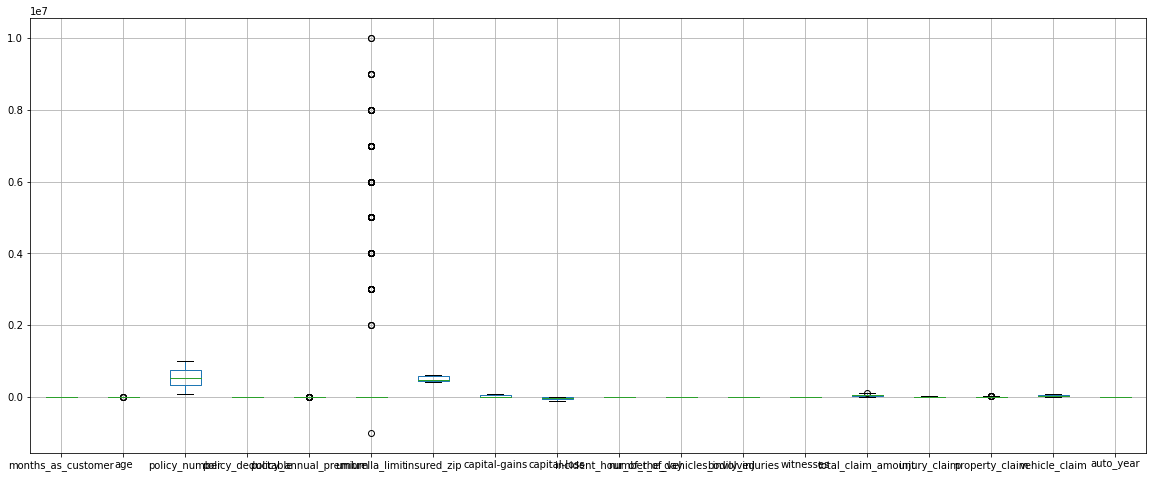

In [21]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.show()

There also contains an outlier in ubrella_limit

# Encoding

In [22]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [23]:
for i in data.columns:
    if data[i].dtypes == "object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [24]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


# Corelation of feature variable with the target variable

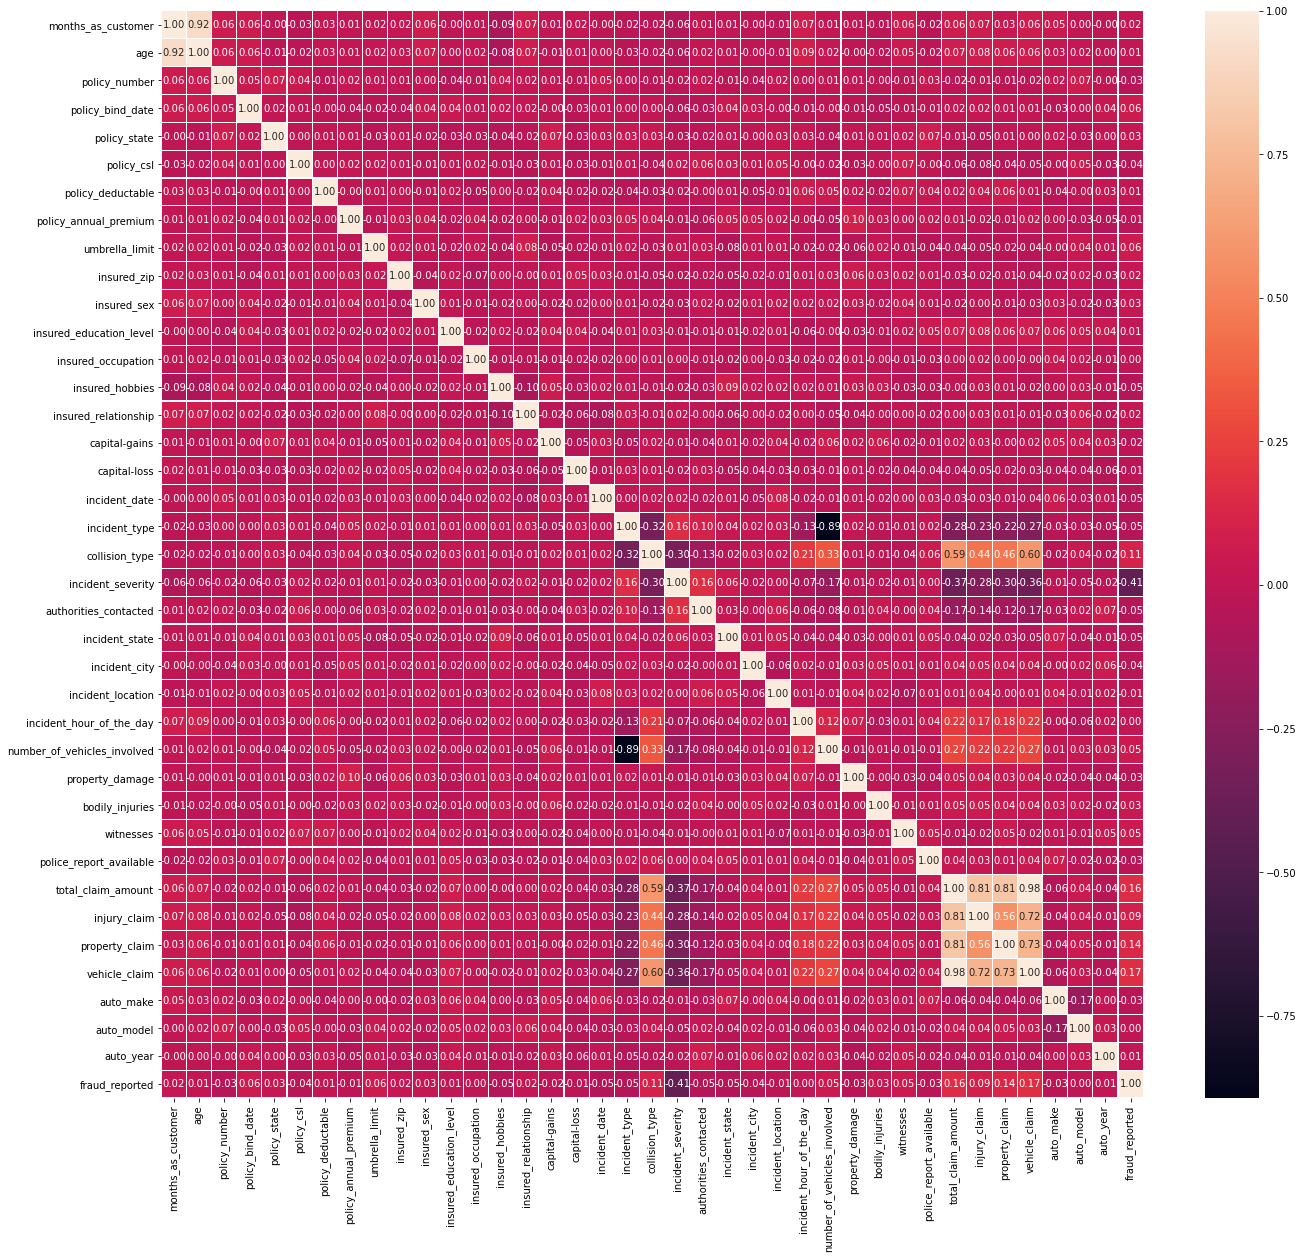

In [25]:
corr_matrix_hmap=data.corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix_hmap,annot=True,linewidths=0.1,fmt="0.2f")
plt.show()

In [26]:
corr_matrix_hmap["fraud_reported"].sort_values(ascending=False)

fraud_reported                 1.000000
vehicle_claim                  0.170049
total_claim_amount             0.163651
property_claim                 0.137835
collision_type                 0.110130
injury_claim                   0.090975
policy_bind_date               0.060642
umbrella_limit                 0.058622
number_of_vehicles_involved    0.051839
witnesses                      0.049497
bodily_injuries                0.033877
insured_sex                    0.030873
policy_state                   0.029432
insured_relationship           0.021043
months_as_customer             0.020544
insured_zip                    0.019368
policy_deductable              0.014817
age                            0.012143
insured_education_level        0.008808
auto_year                      0.007928
incident_hour_of_the_day       0.004316
insured_occupation             0.001564
auto_model                     0.000720
incident_location             -0.008832
policy_annual_premium         -0.014480


Most highly corelated variavle is : vehicle_claim

Least is: incident_severity

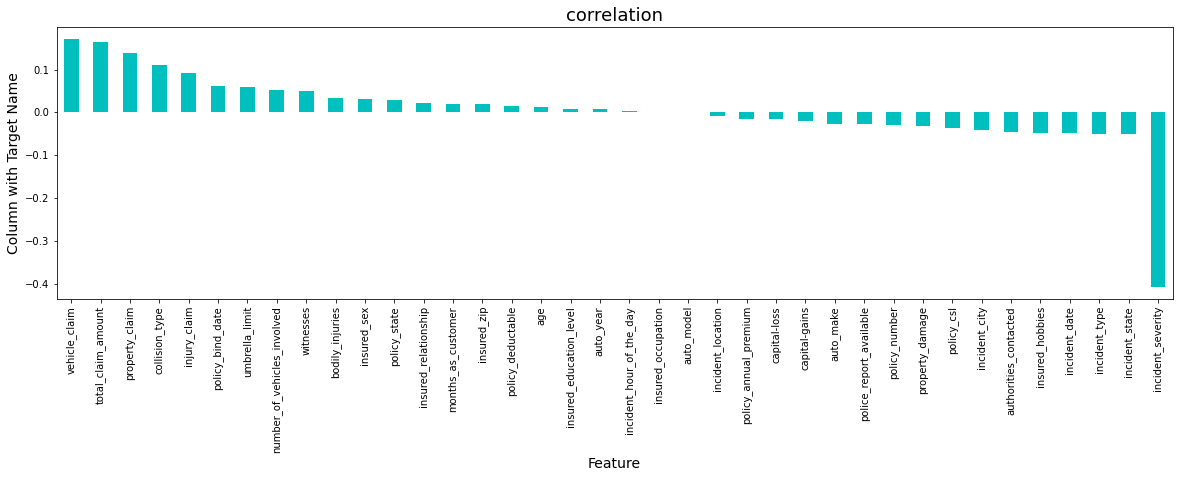

In [27]:
plt.figure(figsize=(20,5))
data.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column with Target Name',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Maximun corelated: vehcile_claim

Minimum corelated:insured_occupation and auto_model and auto_year also somewhat

Negativel corelated: incident_severity

## Outliers 

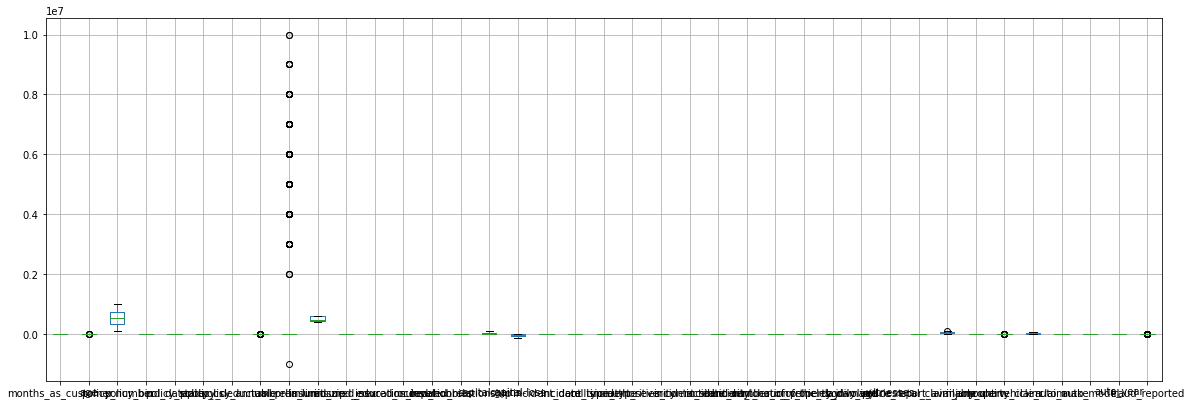

In [28]:
#checking for outliers
data.iloc[:,:].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [29]:
# Removing Outliers
from scipy.stats import zscore
z= np.abs(zscore(data))
z

array([[1.07813958, 0.99083647, 0.09595307, ..., 1.64574255, 0.1834404 ,
        1.74601919],
       [0.2089946 , 0.33407345, 0.79152739, ..., 0.65747047, 0.31549088,
        1.74601919],
       [0.60800168, 1.08891308, 0.55056594, ..., 0.95970204, 0.31549088,
        0.57273139],
       ...,
       [0.64276748, 0.54161057, 1.44891961, ..., 0.02857005, 1.5139238 ,
        0.57273139],
       [2.20802805, 2.52328351, 0.04786687, ..., 1.28637088, 1.18130295,
        0.57273139],
       [2.19064515, 2.3043625 , 0.03830297, ..., 0.65747047, 0.31549088,
        0.57273139]])

In [30]:
threshold = 3
print(np.where(z<3))

(array([  0,   0,   0, ..., 999, 999, 999], dtype=int64), array([ 0,  1,  2, ..., 36, 37, 38], dtype=int64))


In [31]:
#removing outliers
data_new = data[(z<3).all(axis=1)]

In [32]:
data.shape

(1000, 39)

In [33]:
#After removing outliers
data_new.shape

(980, 39)

In [34]:
data=data_new


In [35]:
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,1.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,0.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,0.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,0.0,6500,1300,650,4550,0.0,31.0,2009,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487.0,2.0,2.0,1000,1310.80,0,431289,...,1,0.0,87200,17440,8720,61040,6.0,6.0,2006,0.0
996,285,41,186934,129.0,0.0,0.0,1000,1436.79,0,608177,...,3,0.0,108480,18080,18080,72320,13.0,28.0,2015,0.0
997,130,34,918516,509.0,2.0,1.0,500,1383.49,3000000,442797,...,3,1.0,67500,7500,7500,52500,11.0,19.0,1996,0.0
998,458,62,533940,573.0,0.0,2.0,2000,1356.92,5000000,441714,...,1,1.0,46980,5220,5220,36540,1.0,5.0,1998,0.0


Outliers are been handled

# Seperating Independent Variables and Target Variables

In [36]:
# x= independent variable
x = data.iloc[:,0:-1]
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,1,2,1.0,71610,6510,13020,52080,10.0,1.0,2004
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0,0.0,5070,780,780,3510,8.0,12.0,2007
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,2,3,0.0,34650,7700,3850,23100,4.0,30.0,2007
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,1,2,0.0,63400,6340,6340,50720,3.0,34.0,2014
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,0,1,0.0,6500,1300,650,4550,0.0,31.0,2009


In [37]:
#y = target variable = fraud_reported
y = data.iloc[:,-1]
y.head()

0    1.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: fraud_reported, dtype: float64

In [38]:
x.shape

(980, 38)

In [39]:
y.shape

(980,)

### Rechecking skewness after removing outliers

In [40]:
x.skew()

months_as_customer             0.362608
age                            0.475385
policy_number                  0.036283
policy_bind_date               0.006386
policy_state                  -0.038157
policy_csl                     0.098248
policy_deductable              0.476090
policy_annual_premium          0.035964
umbrella_limit                 1.801424
insured_zip                    0.837283
insured_sex                    0.139324
insured_education_level        0.006286
insured_occupation            -0.055360
insured_hobbies               -0.061488
insured_relationship           0.078339
capital-gains                  0.466619
capital-loss                  -0.376884
incident_date                  0.002604
incident_type                  0.090563
collision_type                -0.194015
incident_severity              0.277726
authorities_contacted         -0.114044
incident_state                -0.149255
incident_city                  0.043882
incident_location             -0.003369


In [41]:
x.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date               float64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day 

## Handling Skewness

In [42]:
#Method for removing skew

from sklearn.preprocessing import power_transform
z = power_transform(x[0:])
data_new= pd.DataFrame(z,columns=x.columns)

In [43]:
x = data_new

In [44]:
#after removing skewness
x.skew()

months_as_customer            -0.133972
age                           -0.002183
policy_number                 -0.161791
policy_bind_date              -0.293677
policy_state                  -0.150765
policy_csl                    -0.096814
policy_deductable              0.022179
policy_annual_premium         -0.007258
umbrella_limit                -7.932397
insured_zip                    0.000000
insured_sex                    0.139324
insured_education_level       -0.187642
insured_occupation            -0.238129
insured_hobbies               -0.248575
insured_relationship          -0.160168
capital-gains                  0.031294
capital-loss                   0.088750
incident_date                 -0.264010
incident_type                 -0.095572
collision_type                -0.204055
incident_severity             -0.079569
authorities_contacted         -0.223816
incident_state                -0.256064
incident_city                 -0.181833
incident_location             -0.288690


In [45]:
# #one can drop umbrella_limit
# x.drop('umbrella_limit',
#   axis='columns')

#one can drop umbrella_limit
x.drop('umbrella_limit',axis='columns', inplace=True)

# Visualizations

In [46]:
data.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

0.0    740
1.0    240
Name: fraud_reported, dtype: int64


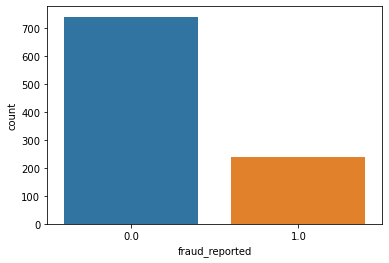

In [47]:
import seaborn as sns
alpha = sns.countplot(x="fraud_reported",data=data)
print(data["fraud_reported"].value_counts())

fraud_reported which is out target variable contains 2 values, 0 and 1

In [48]:
x.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year'],
      dtype='object')

In [49]:
df_visual= x[['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year']].copy()

<AxesSubplot:xlabel='vehicle_claim', ylabel='Density'>

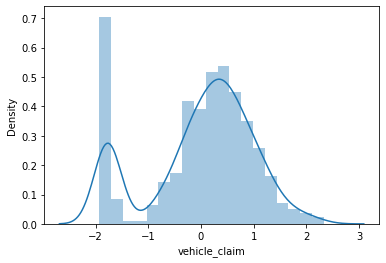

In [50]:
import seaborn as sns
sns.distplot(df_visual['vehicle_claim'],kde=True)

it contains overfitting

In [51]:
# import seaborn as sns
# sns.distplot(df_visual['umbrella_limit'],kde=True)

It don't contains overfitting

# Scaling

In [52]:
x.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
count,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,980.0,9.800000e+02,...,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02,9.800000e+02
mean,-8.791154e-17,-2.356392e-16,-3.743746e-16,1.340198e-16,-1.518060e-17,-1.968380e-17,3.544500e-17,1.033187e-16,0.0,-1.360590e-16,...,6.797284e-18,-4.123686e-17,-5.856993e-17,-4.463550e-17,2.066374e-16,-1.465948e-16,-5.347197e-17,1.872652e-16,-2.053913e-16,6.967216e-18
std,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,0.0,1.000511e+00,...,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00,1.000511e+00
min,-2.411559e+00,-2.858572e+00,-1.934451e+00,-2.169553e+00,-1.265764e+00,-1.231867e+00,-1.215211e+00,-3.051711e+00,0.0,-9.328607e-01,...,-1.264943e+00,-1.406436e+00,-6.786064e-01,-1.930385e+00,-2.172614e+00,-2.193635e+00,-1.928383e+00,-1.813795e+00,-1.965284e+00,-1.657291e+00
25%,-6.921974e-01,-7.252830e-01,-7.735994e-01,-7.993862e-01,-1.265764e+00,-1.231867e+00,-1.215211e+00,-6.967036e-01,0.0,-9.328607e-01,...,-1.264943e+00,-1.406436e+00,-6.786064e-01,-4.483298e-01,-4.536787e-01,-4.326169e-01,-4.433188e-01,-8.375249e-01,-7.724733e-01,-8.589500e-01
50%,7.107941e-02,3.204583e-05,2.358119e-02,9.725113e-02,5.900219e-02,1.890510e-01,6.315396e-02,7.480411e-03,0.0,-9.328607e-01,...,9.489457e-02,-3.480680e-01,-6.786064e-01,1.781448e-01,5.565042e-02,4.325576e-02,2.015161e-01,1.808711e-01,1.388233e-01,-3.856952e-02
75%,6.834392e-01,6.510520e-01,8.405397e-01,8.631367e-01,1.141477e+00,1.233389e+00,1.271808e+00,6.605469e-01,0.0,1.071971e+00,...,1.177809e+00,5.235365e-01,1.473608e+00,6.730569e-01,7.979963e-01,7.601860e-01,6.822520e-01,8.548116e-01,8.723600e-01,8.044020e-01
max,2.034478e+00,2.261323e+00,1.633618e+00,1.545052e+00,1.141477e+00,1.233389e+00,1.271808e+00,2.900276e+00,0.0,1.071971e+00,...,1.177809e+00,1.292411e+00,1.473608e+00,2.475669e+00,2.108484e+00,2.241339e+00,2.332796e+00,1.481706e+00,1.555670e+00,1.670528e+00


In [53]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [54]:
x=mms.fit_transform(x)
x

array([[0.77734391, 0.75409801, 0.53557702, ..., 0.80977259, 0.04489444,
        0.43657897],
       [0.60966749, 0.64175994, 0.33363663, ..., 0.67536561, 0.39386981,
        0.58692128],
       [0.42638858, 0.33644422, 0.70661621, ..., 0.37906556, 0.82810234,
        0.58692128],
       ...,
       [0.41773978, 0.46641077, 0.92660097, ..., 0.87453491, 0.57327901,
        0.04745782],
       [0.97067268, 0.97260724, 0.5487646 , ..., 0.11101935, 0.18895892,
        0.14315387],
       [0.9678556 , 0.9443819 , 0.57219064, ..., 0.67536561, 0.39386981,
        0.58692128]])

# Model Training

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 42)


In [56]:
x_train.shape

(656, 37)

In [57]:
y_train.shape

(656,)

In [58]:
x_test.shape

(324, 37)

In [59]:
y_test.shape

(324,)

In [60]:
y_train

177    0.0
130    0.0
646    0.0
407    0.0
902    0.0
      ... 
109    1.0
278    1.0
878    1.0
445    1.0
105    0.0
Name: fraud_reported, Length: 656, dtype: float64

In [61]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [62]:
lm.fit(x_train,y_train)

LogisticRegression()

In [63]:
lm.score(x_train,y_train)

0.8109756097560976

## Prediction

In [64]:
#predict the values
pred=lm.predict(x_test)
print("Predicted Allitation",pred)
print("Actual Allitation",y_test)

Predicted Allitation [0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.

In [65]:
print('Accuracy Score:',accuracy_score(y_test,pred))

Accuracy Score: 0.75


## Finding Best Random State

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc =accuracy_score(y_test,predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best score is: ",maxAccu,"on Random_state",maxRS)

Best score is:  0.8209876543209876 on Random_state 58


## Tain-Test Model as per Best Ransom state

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state = 58)
LR = LogisticRegression()
LR.fit(x_train,y_train)
predrf = LR.predict(x_test)

In [68]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
print('Accuracy Score:', accuracy_score(y_test,predrf))
print('Confusion Matrix:', confusion_matrix(y_test,predrf))
print('Classification Report:', classification_report(y_test,predrf))

Accuracy Score: 0.8209876543209876
Confusion Matrix: [[232  17]
 [ 41  34]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.85      0.93      0.89       249
         1.0       0.67      0.45      0.54        75

    accuracy                           0.82       324
   macro avg       0.76      0.69      0.71       324
weighted avg       0.81      0.82      0.81       324



In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.7716049382716049
Confusion Matrix: [[207  42]
 [ 32  43]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       249
         1.0       0.51      0.57      0.54        75

    accuracy                           0.77       324
   macro avg       0.69      0.70      0.69       324
weighted avg       0.78      0.77      0.78       324



In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc = rfc.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predrfc))
print('Confusion Matrix:', confusion_matrix(y_test,predrfc))
print('Classification Report:', classification_report(y_test,predrfc))

Accuracy Score: 0.7932098765432098
Confusion Matrix: [[236  13]
 [ 54  21]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.81      0.95      0.88       249
         1.0       0.62      0.28      0.39        75

    accuracy                           0.79       324
   macro avg       0.72      0.61      0.63       324
weighted avg       0.77      0.79      0.76       324



In [71]:
from sklearn import svm
svm = svm.SVC()
svm.fit(x_train,y_train)
predsvm = svm.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,predsvm))
print('Confusion Matrix:', confusion_matrix(y_test,predsvm))
print('Classification Report:', classification_report(y_test,predsvm))

Accuracy Score: 0.7746913580246914
Confusion Matrix: [[246   3]
 [ 70   5]]
Classification Report:               precision    recall  f1-score   support

         0.0       0.78      0.99      0.87       249
         1.0       0.62      0.07      0.12        75

    accuracy                           0.77       324
   macro avg       0.70      0.53      0.50       324
weighted avg       0.74      0.77      0.70       324



In [72]:


pred_train = LR.predict(x_train)
pred_test =LR.predict(x_test) 
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
maxAccu=0
maxRS=0


from sklearn.model_selection import cross_val_score
for j in range(2,16):
    cv_score=cross_val_score(LR,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > maxAccu:
        maxAccu = cv_mean
        maxRS = j
    print(f"At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}")

        
        
    print("\n")
    
        
    
    
 
    

At cross fold 2 cv score is 0.7775510204081633 and accuracy score training is 0.7911585365853658 and accuracy for the testing is 0.8209876543209876


At cross fold 3 cv score is 0.7693914435626598 and accuracy score training is 0.7911585365853658 and accuracy for the testing is 0.8209876543209876


At cross fold 4 cv score is 0.7744897959183674 and accuracy score training is 0.7911585365853658 and accuracy for the testing is 0.8209876543209876


At cross fold 5 cv score is 0.7795918367346939 and accuracy score training is 0.7911585365853658 and accuracy for the testing is 0.8209876543209876


At cross fold 6 cv score is 0.7734550351638486 and accuracy score training is 0.7911585365853658 and accuracy for the testing is 0.8209876543209876


At cross fold 7 cv score is 0.7734693877551021 and accuracy score training is 0.7911585365853658 and accuracy for the testing is 0.8209876543209876


At cross fold 8 cv score is 0.7724160335865654 and accuracy score training is 0.7911585365853658 and

In [73]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(LR,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Logistic Regression",cv_mean)

Cross validation score for Logistic Regression 0.7765034965034966


In [74]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Decision Tree",cv_mean)

Cross validation score for Decision Tree 0.8032478632478633


In [75]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(rfc,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Random Forest Classifier",cv_mean)

Cross validation score for Random Forest Classifier 0.7633255633255634


In [76]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(svm,x,y,cv=j)
cv_mean = cv_score.mean()
print("Cross validation score for Support Vector Machhine",cv_mean)

Cross validation score for Support Vector Machhine 0.7479564879564883


### Lesser the diffrence between Accuracy and cross validation, Best the model

#### Decision Tree shows max accuracy

%Accuracyscore = accuracy - crossvalidation

# Regularization

To mitigate the problem of overfitting and underfitting Regularization Methods are used: Lasso, Ridge or ElasticNet .

In [77]:
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')


In [78]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [79]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)

lss= accuracy_score(y_test,pred_test)
lss

0.8209876543209876

In [80]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score

cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.17065039633155782

# Ensemble Technique

In [81]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':np.arange(2,15),'criterion':["gini","entrophy"]}

rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)



{'criterion': 'gini', 'max_depth': 5}


In [87]:
rf=DecisionTreeClassifier(criterion="gini",max_depth=5)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score:',rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()

print("Cross Validation Score:",rfc*100)

#print(clf.best_params_)

Accuracy Score: 84.25925925925925
Cross Validation Score: 82.14285714285714


# Saving Model

In [88]:
import pickle
filename = "insurance.pkl"
pickle.dump(rf,open(filename,"wb"))


# Conclusion

In [89]:
loaded_model=pickle.load(open('insurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8425925925925926


In [90]:
conclusion = pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,314,315,316,317,318,319,320,321,322,323
Predicted,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Original,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Our model shows 82% accuracy, which predicts the fraud when umbrella_limit was present

### Our Model shows 84% accuracy when we dropped umbrealla_limit which had alot skewness and outliers present